# This notebook is about plotting pass networks with expected threat (xT) of passes per position.

We plot using three different technques:

1. plot based on average player positions when passing.
2. plot based on KDE point (centroid/peak) of player positions when passing.
3. plot based on KDE area of player positions when passing.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mp
import seaborn as sns

# 1. Create a soccer field for StatsBomb data

In [2]:
colors= 'white'

def draw_pitch(ax):
    
    # Pitch Outline & Centre Line
    Pitch = plt.Rectangle([0,0], width = 120, height = 80, fill = False, color = colors)
    # Penalty Areas and midline
    LeftPenalty = plt.Rectangle([0,18], width = 18, height = 44, fill = False, color = colors)
    RightPenalty = plt.Rectangle([102,18], width = 18, height = 44, fill = False, color = colors)
    midline = mp.ConnectionPatch([60,0], [60,80], "data", "data", color = colors)
    # 6-yard boxes
    LeftSixYard = plt.Rectangle([0,30], width = 6, height = 20, fill= False, color = colors)
    RightSixYard = plt.Rectangle([115.1,32], width = 4.9, height = 16, fill = False, color = colors)
    # GoaLs
    LeftGoal = plt.Rectangle([0,36], width = -2, height = 8, fill= False, color = colors)
    RightGoal = plt.Rectangle([120,36], width = 2, height = 8, fill= False, color = colors)
    # Prepare Circles
    centreCircle = plt.Circle((60,40),10,color=colors, fill = False)
    centreSpot = plt.Circle((60,40),0.3,color=colors)
    # Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((12,40),0.3,color=colors)
    rightPenSpot = plt.Circle((108.3,40),0.3,color=colors)
    leftArc = mp.Arc((13,40),height=18,width=18,angle=0,theta1=310,theta2=50,color= colors)
    rightArc = mp.Arc((107,40),height=18,width=18,angle=0,theta1=130,theta2=230,color=colors)
    
    element = [Pitch, LeftPenalty, LeftGoal, RightGoal, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)     

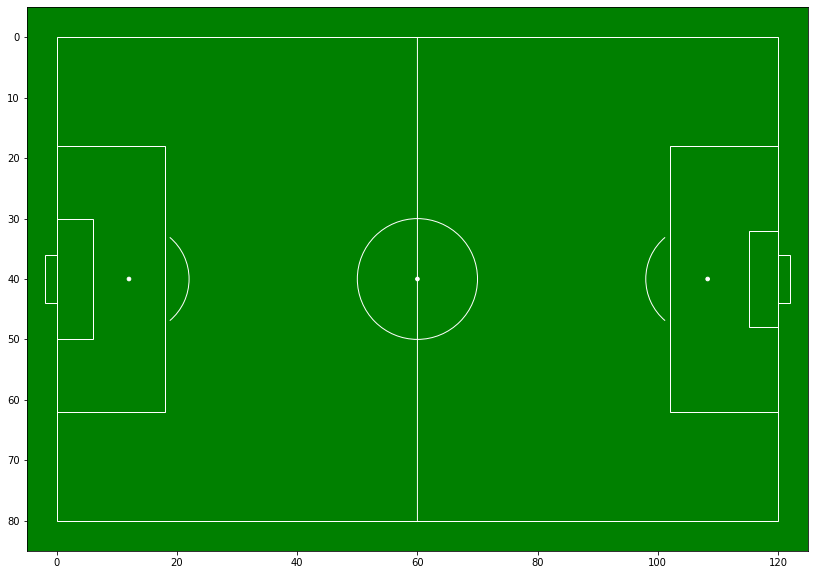

In [3]:
fig, ax = plt.subplots(figsize=(14, 10))
ax.set_facecolor('green')

# Your different plots go here

draw_pitch(ax) # overlay our different objects on the pitch
plt.ylim(85, -5) # Statsbomb has a (0,80) origin. See page 22 of the data dictionary
plt.xlim(-5, 125)
plt.axis('on') # When this is off, the set_facecolor() doesn't work.
plt.show()

# 2. Get data from StatsBomb

In [4]:
from statsbombpy import sb

In [5]:
sb.competitions()

credentials were not supplied. open data access only


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-08-17T23:51:11.837478,None,None,2023-08-17T23:51:11.837478
1,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
2,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
3,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
...,...,...,...,...,...,...,...,...,...,...,...,...
62,55,43,Europe,UEFA Euro,male,False,True,2020,2023-02-24T21:26:47.128979,2023-04-27T22:38:34.970148,2023-04-27T22:38:34.970148,2023-02-24T21:26:47.128979
63,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2023-06-18T19:28:39.443883,2021-06-13T16:17:31.694,None,2023-06-18T19:28:39.443883
64,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2023-07-17T21:19:03.032991,2023-07-17T21:21:56.497106,2023-07-17T21:21:56.497106,2023-07-17T21:19:03.032991
65,72,107,International,Women's World Cup,female,False,True,2023,2023-09-01T12:34:19.705316,2023-09-01T12:35:45.762196,2023-09-01T12:35:45.762196,2023-09-01T12:34:19.705316


In [6]:
#Get 2018 World Cup competition
sb.matches(competition_id=43, season_id=3)

credentials were not supplied. open data access only


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,data_version,shot_fidelity_version,xy_fidelity_version
0,7585,2018-07-03,20:00:00.000,International - FIFA World Cup,2018,Colombia,England,1,1,available,scheduled,2023-07-24T13:06:27.791230,2021-06-13T16:17:31.694,4,Round of 16,Otkritie Bank Arena,Mark Geiger,1.0.2,None,None
1,7570,2018-06-28,20:00:00.000,International - FIFA World Cup,2018,England,Belgium,0,1,available,scheduled,2023-07-24T13:06:39.637575,2021-06-13T16:17:31.694,3,Group Stage,Stadion Kaliningrad,Damir Skomina,1.0.2,None,None
2,7586,2018-07-03,16:00:00.000,International - FIFA World Cup,2018,Sweden,Switzerland,1,0,available,scheduled,2023-07-24T13:05:18.578795,2021-06-13T16:17:31.694,4,Round of 16,Saint-Petersburg Stadium,Damir Skomina,1.0.2,None,None
3,7557,2018-06-25,20:00:00.000,International - FIFA World Cup,2018,Iran,Portugal,1,1,available,scheduled,2023-07-24T13:03:08.956903,2021-06-13T16:17:31.694,3,Group Stage,Mordovia Arena,Enrique Cáceres,1.0.2,None,None
4,7542,2018-06-20,14:00:00.000,International - FIFA World Cup,2018,Portugal,Morocco,1,0,available,scheduled,2023-07-24T13:02:10.657273,2021-06-13T16:17:31.694,2,Group Stage,Stadion Luzhniki,Mark Geiger,1.0.2,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,7540,2018-06-19,20:00:00.000,International - FIFA World Cup,2018,Russia,Egypt,3,1,available,scheduled,2023-07-24T13:01:08.475209,2021-06-13T16:17:31.694,2,Group Stage,Saint-Petersburg Stadium,Enrique Cáceres,1.0.2,None,None
60,8652,2018-07-07,20:00:00.000,International - FIFA World Cup,2018,Russia,Croatia,2,2,available,scheduled,2023-07-24T13:09:34.513519,2021-06-13T16:17:31.694,5,Quarter-finals,\tOlimpiyskiy Stadion Fisht,Sandro Ricci,1.0.2,None,None
61,7563,2018-06-26,16:00:00.000,International - FIFA World Cup,2018,Denmark,France,0,0,available,scheduled,2023-07-24T13:00:03.862715,2021-06-13T16:17:31.694,3,Group Stage,Stadion Luzhniki,Sandro Ricci,1.0.2,None,None
62,7556,2018-06-24,17:00:00.000,International - FIFA World Cup,2018,Japan,Senegal,2,2,available,scheduled,2023-07-24T13:01:07.118188,2021-06-13T16:17:31.694,2,Group Stage,\tEkaterinburg Arena,Gianluca Rocchi,1.0.2,None,None


In [141]:
# Get all the Spain matches
sb.matches(competition_id=43, season_id=3)[(sb.matches(competition_id=43, season_id=3)["home_team"] == 'Spain') | (sb.matches(competition_id=43, season_id=3)["away_team"] == 'Spain')]

credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,data_version,shot_fidelity_version,xy_fidelity_version
17,7576,2018-06-15,20:00:00.000,International - FIFA World Cup,2018,Portugal,Spain,3,3,available,scheduled,2021-12-06T22:30:32.372616,2021-06-13T16:17:31.694,1,Group Stage,\tOlimpiyskiy Stadion Fisht,Gianluca Rocchi,1.0.2,None,None
42,7582,2018-07-01,16:00:00.000,International - FIFA World Cup,2018,Spain,Russia,1,1,available,scheduled,2023-07-24T13:01:16.717670,2021-06-13T16:17:31.694,4,Round of 16,Stadion Luzhniki,Björn Kuipers,1.0.2,None,None
45,7560,2018-06-25,20:00:00.000,International - FIFA World Cup,2018,Spain,Morocco,2,2,available,scheduled,2023-07-24T13:06:04.289776,2021-06-13T16:17:31.694,3,Group Stage,Stadion Kaliningrad,Ravshan Irmatov,1.0.2,None,None
51,7543,2018-06-20,20:00:00.000,International - FIFA World Cup,2018,Iran,Spain,0,1,available,scheduled,2023-07-24T12:55:51.689554,2021-06-13T16:17:31.694,2,Group Stage,Ak Bars Arena,Andrés Cunha,1.0.2,None,None


In [142]:
# Get Spain v, Russia
events_7582 = sb.events(match_id=7582)

credentials were not supplied. open data access only


# 3. Data Preparation

In [143]:
pd.set_option('max_colwidth', 1000)

In [154]:
# Get position info
spain_lineup_7582 = sb.lineups(match_id=7582)["Spain"]

credentials were not supplied. open data access only


In [155]:
# Trim it down
spain_lineup_7582_m = spain_lineup_7582[['player_id', 'player_name', 'jersey_number','positions']]

In [156]:
spain_lineup_7582_m

,player_id,player_name,jersey_number,positions
0,3064,David Josué Jiménez Silva,21,"[{'position_id': 19, 'position': 'Center Attacking Midfield', 'from': '00:00', 'to': '66:13', 'from_period': 1, 'to_period': 2, 'start_reason': 'Starting XI', 'end_reason': 'Substitution - Off (Tactical)'}]"
1,3333,David de Gea Quintana,1,"[{'position_id': 1, 'position': 'Goalkeeper', 'from': '00:00', 'to': None, 'from_period': 1, 'to_period': None, 'start_reason': 'Starting XI', 'end_reason': 'Final Whistle'}]"
2,3498,Ignacio Monreal Eraso,16,[]
3,3957,César Azpilicueta Tanco,14,[]
4,4926,Francisco Román Alarcón Suárez,22,"[{'position_id': 16, 'position': 'Left Midfield', 'from': '00:00', 'to': None, 'from_period': 1, 'to_period': None, 'start_reason': 'Starting XI', 'end_reason': 'Final Whistle'}]"
5,5198,Diego da Silva Costa,19,"[{'position_id': 23, 'position': 'Center Forward', 'from': '00:00', 'to': '79:02', 'from_period': 1, 'to_period': 2, 'start_reason': 'Starting XI', 'end_reason': 'Substitution - Off (Tactical)'}]"
6,5199,Jorge Resurrección Merodio,8,"[{'position_id': 9, 'position': 'Right Defensive Midfield', 'from': '00:00', 'to': None, 'from_period': 1, 'to_period': None, 'start_reason': 'Starting XI', 'end_reason': 'Final Whistle'}]"
7,5200,Lucas Vázquez Iglesias,11,[]
8,5201,Sergio Ramos García,15,"[{'position_id': 5, 'position': 'Left Center Back', 'from': '00:00', 'to': None, 'from_period': 1, 'to_period': None, 'start_reason': 'Starting XI', 'end_reason': 'Final Whistle'}]"
9,5202,José Ignacio Fernández Iglesias,4,"[{'position_id': 2, 'position': 'Right Back', 'from': '00:00', 'to': '69:30', 'from_period': 1, 'to_period': 2, 'start_reason': 'Starting XI', 'end_reason': 'Substitution - Off (Tactical)'}]"


In [157]:
# Transfrom the 'positions' column
t = spain_lineup_7582_m['positions'].explode()

In [158]:
# Apply the pd.Series constructor to each row. 
# Apply will be flexible and return a DataFrame since each row is a Series now.
t = t.apply(pd.Series)

In [159]:
# Get rid of the 'positions' column
spain_lineup_7582_m.drop(["positions"],axis=1,inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_788\1026924652.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spain_lineup_7582_m = spain_lineup_7582_m.drop(["positions"],axis=1,inplace=True)


In [160]:
# Add the 't' DF to the 'spain_lineup_7582_m DF
spain_lineup_7582_m = pd.concat([spain_lineup_7582_m, t], axis=1)

In [161]:
spain_lineup_7582_m

,position_id,position,from,to,from_period,to_period,start_reason,end_reason,0
0,19.0,Center Attacking Midfield,00:00,66:13,1.0,2.0,Starting XI,Substitution - Off (Tactical),NaN
1,1.0,Goalkeeper,00:00,None,1.0,NaN,Starting XI,Final Whistle,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16.0,Left Midfield,00:00,None,1.0,NaN,Starting XI,Final Whistle,NaN
5,23.0,Center Forward,00:00,79:02,1.0,2.0,Starting XI,Substitution - Off (Tactical),NaN
6,9.0,Right Defensive Midfield,00:00,None,1.0,NaN,Starting XI,Final Whistle,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5.0,Left Center Back,00:00,None,1.0,NaN,Starting XI,Final Whistle,NaN
9,2.0,Right Back,00:00,69:30,1.0,2.0,Starting XI,Substitution - Off (Tactical),NaN


In [18]:
# add a position abbreviation column to the lineup DF by mapping to 'position_id'

position_dict = {1: 'GK', 2: 'RB', 3: 'RCB', 5: 'LCB', 6: 'LB', 9: 'RDM', 11: 'LDM', 12: 'RM',
                  16: 'LM', 19: 'CAM', 23: 'CF'}

In [19]:
spain_lineup_7582_m["position_abb"] = spain_lineup_7582_m['position_id'].map(position_dict)

In [20]:
spain_lineup_7582_m

,player_id,player_name,jersey_number,position_id,position,from,to,from_period,to_period,start_reason,end_reason,0,position_abb
0,3064,David Josué Jiménez Silva,21,19.0,Center Attacking Midfield,00:00,66:13,1.0,2.0,Starting XI,Substitution - Off (Tactical),NaN,CAM
1,3333,David de Gea Quintana,1,1.0,Goalkeeper,00:00,None,1.0,NaN,Starting XI,Final Whistle,NaN,GK
2,3498,Ignacio Monreal Eraso,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3957,César Azpilicueta Tanco,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4926,Francisco Román Alarcón Suárez,22,16.0,Left Midfield,00:00,None,1.0,NaN,Starting XI,Final Whistle,NaN,LM
5,5198,Diego da Silva Costa,19,23.0,Center Forward,00:00,79:02,1.0,2.0,Starting XI,Substitution - Off (Tactical),NaN,CF
6,5199,Jorge Resurrección Merodio,8,9.0,Right Defensive Midfield,00:00,None,1.0,NaN,Starting XI,Final Whistle,NaN,RDM
7,5200,Lucas Vázquez Iglesias,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5201,Sergio Ramos García,15,5.0,Left Center Back,00:00,None,1.0,NaN,Starting XI,Final Whistle,NaN,LCB
9,5202,José Ignacio Fernández Iglesias,4,2.0,Right Back,00:00,69:30,1.0,2.0,Starting XI,Substitution - Off (Tactical),NaN,RB


In [21]:
# Get all the spain passes (successful or not)
spain_passes_7582 = events_7582[(events_7582['type'] == 'Pass') & (events_7582['team']=='Spain')]

In [22]:
# Trim down to get the columns you need
spain_passes_7582 = spain_passes_7582[['player_id', 'location', 'pass_end_location', 'pass_recipient', 'pass_outcome', 'ball_receipt_outcome', 'period', 'minute', 'second', 'timestamp']]

In [23]:
# combine spain_passes_7582 with spain_lineup_7582_m
# Since both DFs have player_id column, we can map based on that common column
# 1. Make a dict from the two columns of DF spain_lineup_7582_m  'player_id' and 'position_abb'

position_id = dict(zip(spain_lineup_7582_m.player_id, spain_lineup_7582_m.position_id))

In [24]:
position_id

{3064: 19.0,
 3333: 1.0,
 3498: nan,
 3957: nan,
 4926: 16.0,
 5198: 23.0,
 5199: 9.0,
 5200: nan,
 5201: 5.0,
 5202: 2.0,
 5203: 11.0,
 5208: nan,
 5211: 6.0,
 5213: 3.0,
 5216: 19.0,
 5217: 23.0,
 5718: 12.0,
 5719: 12.0,
 5721: 2.0,
 6381: nan,
 6395: nan,
 6689: nan,
 7028: nan}

In [25]:
# 2. map the position ids  
spain_passes_7582["position_id"] = spain_passes_7582['player_id'].map(position_id)

In [26]:
spain_passes_7582 

,player_id,location,pass_end_location,pass_recipient,pass_outcome,ball_receipt_outcome,period,minute,second,timestamp,position_id
12,5199.0,"[60.0, 41.0]","[38.0, 35.0]",Sergio Ramos García,NaN,NaN,1,0,2,00:00:02.267,9.0
13,5201.0,"[42.0, 37.0]","[99.0, 28.0]",Diego da Silva Costa,Incomplete,NaN,1,0,6,00:00:06.267,5.0
18,5201.0,"[54.0, 13.0]","[50.0, 27.0]",Gerard Piqué Bernabéu,NaN,NaN,1,0,37,00:00:37.067,5.0
19,5213.0,"[48.0, 32.0]","[56.0, 31.0]",Jorge Resurrección Merodio,NaN,NaN,1,0,40,00:00:40.187,3.0
20,5199.0,"[59.0, 32.0]","[66.0, 8.0]",Jordi Alba Ramos,NaN,NaN,1,0,42,00:00:42.987,9.0
...,...,...,...,...,...,...,...,...,...,...,...
1487,5216.0,"[55.0, 29.0]","[55.0, 17.0]",Francisco Román Alarcón Suárez,NaN,NaN,4,119,58,00:14:58.220,19.0
1488,4926.0,"[54.0, 22.0]","[48.0, 25.0]",Sergio Busquets i Burgos,NaN,NaN,4,120,0,00:15:00.860,16.0
1490,5217.0,"[93.0, 29.0]","[98.0, 36.0]",Rodrigo Moreno Machado,NaN,NaN,4,120,10,00:15:10.100,23.0
1493,3333.0,"[10.0, 43.0]","[23.0, 37.0]",Sergio Ramos García,NaN,NaN,4,120,59,00:15:59.980,1.0


In [27]:
# 3. Now that we have a position_id in spain_passes_7582, we can map the position_abb just like we did for spain_lineup_7582_m earlier

spain_passes_7582["position_abb"] = spain_passes_7582['position_id'].map(position_dict)


In [28]:
spain_passes_7582

,player_id,location,pass_end_location,pass_recipient,pass_outcome,ball_receipt_outcome,period,minute,second,timestamp,position_id,position_abb
12,5199.0,"[60.0, 41.0]","[38.0, 35.0]",Sergio Ramos García,NaN,NaN,1,0,2,00:00:02.267,9.0,RDM
13,5201.0,"[42.0, 37.0]","[99.0, 28.0]",Diego da Silva Costa,Incomplete,NaN,1,0,6,00:00:06.267,5.0,LCB
18,5201.0,"[54.0, 13.0]","[50.0, 27.0]",Gerard Piqué Bernabéu,NaN,NaN,1,0,37,00:00:37.067,5.0,LCB
19,5213.0,"[48.0, 32.0]","[56.0, 31.0]",Jorge Resurrección Merodio,NaN,NaN,1,0,40,00:00:40.187,3.0,RCB
20,5199.0,"[59.0, 32.0]","[66.0, 8.0]",Jordi Alba Ramos,NaN,NaN,1,0,42,00:00:42.987,9.0,RDM
...,...,...,...,...,...,...,...,...,...,...,...,...
1487,5216.0,"[55.0, 29.0]","[55.0, 17.0]",Francisco Román Alarcón Suárez,NaN,NaN,4,119,58,00:14:58.220,19.0,CAM
1488,4926.0,"[54.0, 22.0]","[48.0, 25.0]",Sergio Busquets i Burgos,NaN,NaN,4,120,0,00:15:00.860,16.0,LM
1490,5217.0,"[93.0, 29.0]","[98.0, 36.0]",Rodrigo Moreno Machado,NaN,NaN,4,120,10,00:15:10.100,23.0,CF
1493,3333.0,"[10.0, 43.0]","[23.0, 37.0]",Sergio Ramos García,NaN,NaN,4,120,59,00:15:59.980,1.0,GK


In [29]:
# Now let's move the column into a more readable order
# 1. Create a list of column names
cols = spain_passes_7582.columns.tolist()

In [30]:
cols

['player_id',
 'location',
 'pass_end_location',
 'pass_recipient',
 'pass_outcome',
 'ball_receipt_outcome',
 'period',
 'minute',
 'second',
 'timestamp',
 'position_id',
 'position_abb']

In [31]:
# 2. Change the column order around in the list
cols=['player_id',
 'position_id',
 'position_abb',
 'location',
 'pass_end_location',
 'pass_recipient',
 'pass_outcome',
 'ball_receipt_outcome',
 'period',
 'minute',
 'second',
 'timestamp']

In [32]:
# 3. reindex the columns using the list
spain_passes_7582 = spain_passes_7582.reindex(columns= cols)

In [33]:
spain_passes_7582.head(1)

,player_id,position_id,position_abb,location,pass_end_location,pass_recipient,pass_outcome,ball_receipt_outcome,period,minute,second,timestamp
12,5199.0,9.0,RDM,"[60.0, 41.0]","[38.0, 35.0]",Sergio Ramos García,NaN,NaN,1,0,2,00:00:02.267


In [34]:
# We need player_id, position_id, and position_abb for the pass recipient as well

# We can use the columns in the lineup DF to build everything off of the 'pass_recipent' column 
#        in spain_passes_7582


# 1. # Change column names:  player_id_pass, position_id_pass, position_abb_pass

# 2. take the pass recipient name and map player_id_receive
    # 3. position_id_receive
    # 4. position_abb_receive
    

#1
spain_passes_7582.rename(columns={'player_id': 'player_id_pass'}, inplace=True)
spain_passes_7582.rename(columns={'position_id': 'position_id_pass'}, inplace = True)
spain_passes_7582.rename(columns={'position_abb': 'position_abb_pass'}, inplace = True)

In [35]:
spain_passes_7582.head(1)

,player_id_pass,position_id_pass,position_abb_pass,location,pass_end_location,pass_recipient,pass_outcome,ball_receipt_outcome,period,minute,second,timestamp
12,5199.0,9.0,RDM,"[60.0, 41.0]","[38.0, 35.0]",Sergio Ramos García,NaN,NaN,1,0,2,00:00:02.267


In [36]:
# create a dict from 'player_name' and 'player_id' columns
name_id = dict(zip(spain_lineup_7582_m.player_name,spain_lineup_7582_m.player_id))

In [37]:
name_id

{'David Josué Jiménez Silva': 3064,
 'David de Gea Quintana': 3333,
 'Ignacio Monreal Eraso': 3498,
 'César Azpilicueta Tanco': 3957,
 'Francisco Román Alarcón Suárez': 4926,
 'Diego da Silva Costa': 5198,
 'Jorge Resurrección Merodio': 5199,
 'Lucas Vázquez Iglesias': 5200,
 'Sergio Ramos García': 5201,
 'José Ignacio Fernández Iglesias': 5202,
 'Sergio Busquets i Burgos': 5203,
 'Thiago Alcântara do Nascimento': 5208,
 'Jordi Alba Ramos': 5211,
 'Gerard Piqué Bernabéu': 5213,
 'Andrés Iniesta Luján': 5216,
 'Iago Aspas Juncal': 5217,
 'Rodrigo Moreno Machado': 5718,
 'Marco Asensio Willemsen': 5719,
 'Daniel Carvajal Ramos': 5721,
 'Saúl Ñíguez Esclapez': 6381,
 'Kepa Arrizabalaga Revuelta': 6395,
 'Álvaro Odriozola Arzallus': 6689,
 'José Manuel Reina Páez': 7028}

In [38]:
# create player_id_receive
spain_passes_7582["player_id_receive"] = spain_passes_7582['pass_recipient'].map(name_id)

In [39]:
# create position_id_receive
spain_passes_7582['position_id_receive'] = spain_passes_7582['player_id_receive'].map(position_id)

In [40]:
# create position_abb_receive
spain_passes_7582['position_abb_receive'] = spain_passes_7582['position_id_receive'].map(position_dict)

In [41]:
# rearrange columns again
cols = spain_passes_7582.columns.tolist()

In [42]:
cols

['player_id_pass',
 'position_id_pass',
 'position_abb_pass',
 'location',
 'pass_end_location',
 'pass_recipient',
 'pass_outcome',
 'ball_receipt_outcome',
 'period',
 'minute',
 'second',
 'timestamp',
 'player_id_receive',
 'position_id_receive',
 'position_abb_receive']

In [43]:
cols = ['player_id_pass',
 'position_id_pass',
 'position_abb_pass',
 'location',
 'pass_end_location',
 'pass_recipient',
 'player_id_receive',
 'position_id_receive',
 'position_abb_receive',
 'pass_outcome',
 'ball_receipt_outcome',
 'period',
 'minute',
 'second',
 'timestamp']

In [44]:
spain_passes_7582 = spain_passes_7582.reindex(columns=cols)

In [45]:
# Get rid of the 'pass recipient column' 
spain_passes_7582.drop(['pass_recipient'], axis=1, inplace=True)

In [46]:
spain_passes_7582.head(1)

,player_id_pass,position_id_pass,position_abb_pass,location,pass_end_location,player_id_receive,position_id_receive,position_abb_receive,pass_outcome,ball_receipt_outcome,period,minute,second,timestamp
12,5199.0,9.0,RDM,"[60.0, 41.0]","[38.0, 35.0]",5201.0,5.0,LCB,NaN,NaN,1,0,2,00:00:02.267


# Get Positional Information

In [47]:
# 1. Get average location of passes by position
# 2. Cet all combinations and direction of passes by positions

In [48]:
# Do it the easy way for now by splitting the location coordinates into x an y columns
# How can I use the 'location' column instead?

x = spain_passes_7582['location'].str[0]
y = spain_passes_7582['location'].str[1]

In [49]:
spain_passes_7582['x'] = x
spain_passes_7582['y'] = y

In [50]:
#1
avg_location_and_count = (spain_passes_7582.groupby('position_abb_pass')
                          .agg({'x': ['mean'], 'y': ['mean', 'count']}))

In [51]:
# change column names
avg_location_and_count.columns = ['x^', 'y^', 'count']

In [52]:
avg_location_and_count

,x^,y^,count
position_abb_pass,,,
CAM,78.185185,29.024691,81
CF,81.064516,31.774194,31
GK,10.458333,39.041667,24
LB,70.975904,8.746988,166
LCB,58.566667,22.883333,180
LDM,63.061728,33.888889,81
LM,81.137500,24.387500,160
RB,70.731183,68.075269,93
RCB,54.053030,48.992424,132


In [53]:
# 2. calculate the number of passes between each position 
# This gets all the combinations and gets both ways (returns a multi-index Pandas series)

pass_network = spain_passes_7582[['position_abb_pass','position_abb_receive']].value_counts()

In [54]:
# This gives us our lines and the thickness of those lines (pass count from and to each position) - and we can get overall circle size as well.
pass_network

position_abb_pass  position_abb_receive
LB                 LM                      60
LCB                LB                      52
LM                 LB                      42
LB                 LCB                     40
RDM                LCB                     38
                                           ..
CF                 LCB                      1
RB                 GK                       1
RDM                GK                       1
CF                 RB                       1
GK                 RB                       1
Length: 99, dtype: int64

In [55]:
# Add the start and end average position location to each row of the pass_network
# 1. turn the series into a DF
pass_network_df = pass_network.to_frame()

In [56]:
# 2. reset the index to turn the multi index into columns
pass_network_df = pass_network_df.reset_index()

In [57]:
pass_network_df

,position_abb_pass,position_abb_receive,0
0,LB,LM,60
1,LCB,LB,52
2,LM,LB,42
3,LB,LCB,40
4,RDM,LCB,38
...,...,...,...
94,CF,LCB,1
95,RB,GK,1
96,RDM,GK,1
97,CF,RB,1


In [58]:
# 3. map the x and y location columns for each position to the right of each position

In [59]:
avg_location_and_count.reset_index()

,position_abb_pass,x^,y^,count
0,CAM,78.185185,29.024691,81
1,CF,81.064516,31.774194,31
2,GK,10.458333,39.041667,24
3,LB,70.975904,8.746988,166
4,LCB,58.566667,22.883333,180
5,LDM,63.061728,33.888889,81
6,LM,81.137500,24.387500,160
7,RB,70.731183,68.075269,93
8,RCB,54.053030,48.992424,132
9,RDM,68.097403,48.967532,154


In [60]:
xy_list = avg_location_and_count[['x^','y^']].values.tolist()

In [61]:
avg_location_and_count['location_pass'] = xy_list

In [62]:
avg_loc = avg_location_and_count.reset_index()

In [63]:
avg_loc.drop(['x^','y^'], axis=1,inplace=True)

In [64]:
avg_loc

,position_abb_pass,count,location_pass
0,CAM,81,"[78.18518518518519, 29.02469135802469]"
1,CF,31,"[81.06451612903226, 31.774193548387096]"
2,GK,24,"[10.458333333333334, 39.041666666666664]"
3,LB,166,"[70.97590361445783, 8.74698795180723]"
4,LCB,180,"[58.56666666666667, 22.883333333333333]"
5,LDM,81,"[63.06172839506173, 33.888888888888886]"
6,LM,160,"[81.1375, 24.3875]"
7,RB,93,"[70.73118279569893, 68.0752688172043]"
8,RCB,132,"[54.053030303030305, 48.99242424242424]"
9,RDM,154,"[68.09740259740259, 48.967532467532465]"


In [65]:
# Here's our dictionary map for the position name and avg position location

pos_name_avg_pos = dict(zip(avg_loc.position_abb_pass,avg_loc.location_pass))

In [66]:
pos_name_avg_pos

{'CAM': [78.18518518518519, 29.02469135802469],
 'CF': [81.06451612903226, 31.774193548387096],
 'GK': [10.458333333333334, 39.041666666666664],
 'LB': [70.97590361445783, 8.74698795180723],
 'LCB': [58.56666666666667, 22.883333333333333],
 'LDM': [63.06172839506173, 33.888888888888886],
 'LM': [81.1375, 24.3875],
 'RB': [70.73118279569893, 68.0752688172043],
 'RCB': [54.053030303030305, 48.99242424242424],
 'RDM': [68.09740259740259, 48.967532467532465],
 'RM': [82.12727272727273, 43.69090909090909]}

In [67]:
# map starting location to position_abb_pass
pass_network_df['start_loc'] = pass_network_df['position_abb_pass'].map(pos_name_avg_pos)     

In [68]:
# map ending location to position_abb_receive
pass_network_df['end_loc'] = pass_network_df['position_abb_receive'].map(pos_name_avg_pos)  

In [69]:
# change the column name of the number of passes
pass_network_df = pass_network_df.rename(columns={0:'No of passes'})

In [70]:
pass_network_df

,position_abb_pass,position_abb_receive,No of passes,start_loc,end_loc
0,LB,LM,60,"[70.97590361445783, 8.74698795180723]","[81.1375, 24.3875]"
1,LCB,LB,52,"[58.56666666666667, 22.883333333333333]","[70.97590361445783, 8.74698795180723]"
2,LM,LB,42,"[81.1375, 24.3875]","[70.97590361445783, 8.74698795180723]"
3,LB,LCB,40,"[70.97590361445783, 8.74698795180723]","[58.56666666666667, 22.883333333333333]"
4,RDM,LCB,38,"[68.09740259740259, 48.967532467532465]","[58.56666666666667, 22.883333333333333]"
...,...,...,...,...,...
94,CF,LCB,1,"[81.06451612903226, 31.774193548387096]","[58.56666666666667, 22.883333333333333]"
95,RB,GK,1,"[70.73118279569893, 68.0752688172043]","[10.458333333333334, 39.041666666666664]"
96,RDM,GK,1,"[68.09740259740259, 48.967532467532465]","[10.458333333333334, 39.041666666666664]"
97,CF,RB,1,"[81.06451612903226, 31.774193548387096]","[70.73118279569893, 68.0752688172043]"


In [71]:
# rearrange the columns order
pass_network_df.columns.to_list()

['position_abb_pass',
 'position_abb_receive',
 'No of passes',
 'start_loc',
 'end_loc']

In [72]:
pass_network_df=pass_network_df[['position_abb_pass',
 'position_abb_receive',
 'start_loc',
 'end_loc',
 'No of passes']]

## Pass Network DF Ready for Plotting

### We have two DFs

In [73]:
pass_network_df

,position_abb_pass,position_abb_receive,start_loc,end_loc,No of passes
0,LB,LM,"[70.97590361445783, 8.74698795180723]","[81.1375, 24.3875]",60
1,LCB,LB,"[58.56666666666667, 22.883333333333333]","[70.97590361445783, 8.74698795180723]",52
2,LM,LB,"[81.1375, 24.3875]","[70.97590361445783, 8.74698795180723]",42
3,LB,LCB,"[70.97590361445783, 8.74698795180723]","[58.56666666666667, 22.883333333333333]",40
4,RDM,LCB,"[68.09740259740259, 48.967532467532465]","[58.56666666666667, 22.883333333333333]",38
...,...,...,...,...,...
94,CF,LCB,"[81.06451612903226, 31.774193548387096]","[58.56666666666667, 22.883333333333333]",1
95,RB,GK,"[70.73118279569893, 68.0752688172043]","[10.458333333333334, 39.041666666666664]",1
96,RDM,GK,"[68.09740259740259, 48.967532467532465]","[10.458333333333334, 39.041666666666664]",1
97,CF,RB,"[81.06451612903226, 31.774193548387096]","[70.73118279569893, 68.0752688172043]",1


In [74]:
avg_loc 

,position_abb_pass,count,location_pass
0,CAM,81,"[78.18518518518519, 29.02469135802469]"
1,CF,31,"[81.06451612903226, 31.774193548387096]"
2,GK,24,"[10.458333333333334, 39.041666666666664]"
3,LB,166,"[70.97590361445783, 8.74698795180723]"
4,LCB,180,"[58.56666666666667, 22.883333333333333]"
5,LDM,81,"[63.06172839506173, 33.888888888888886]"
6,LM,160,"[81.1375, 24.3875]"
7,RB,93,"[70.73118279569893, 68.0752688172043]"
8,RCB,132,"[54.053030303030305, 48.99242424242424]"
9,RDM,154,"[68.09740259740259, 48.967532467532465]"


# Standard Pass Network

In [75]:
# Set alpha and linewidth to control line based on no_of_passes 
min_alpha = .25
min_linewidth = 1
alpha =  min_alpha               
linewidth = min_linewidth

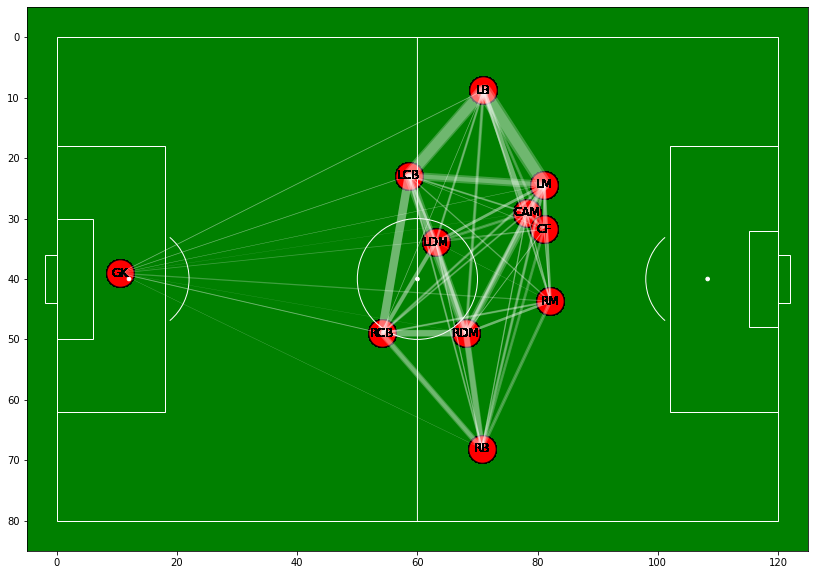

In [76]:
fig, ax = plt.subplots(figsize=(14, 10))
ax.set_facecolor('green')
fig.patch.set_facecolor('white')
#fig.patch.set_alpha(0.7)
   
# plot pass lines 
# We manipulate 'linewidth' and 'alpha' based on No_of_passes value. For 'alpha,' we need to create a normalized column of .1 to 1

    
for i in range(len(pass_network_df)):
    ax.annotate('',xy = (pass_network_df.iloc[i]['start_loc'][0], pass_network_df.iloc[i]['start_loc'][1]), xycoords = 'data',
              xytext = (pass_network_df.iloc[i]['end_loc'][0], pass_network_df.iloc[i]['end_loc'][1]), textcoords = 'data',
              arrowprops=dict(arrowstyle="-",connectionstyle="arc3", linewidth=pass_network_df['No of passes'][i]/4, color='white', alpha=alpha),)   
    

# plot position markers                 
    for i in avg_loc['location_pass']: plt.scatter(*i, s = 750, color ='red', edgecolors='black', linewidth=1, alpha=.75)
    # plt.scatter(*zip(*avg_loc['location_pass']))    
    # plt.scatter([i[0] for i in avg_loc['location_pass'] ], [i[1] for i in avg_loc['location_pass']])
    
    
# put position name in marker     
    for index, row in avg_loc.iterrows():
        ax.annotate(row['position_abb_pass'], xy=(row['location_pass'][0], row['location_pass'][1]), c='black', va='center',
                   ha='center', size=12)  
            
draw_pitch(ax) #overlay our different objects on the pitch

plt.ylim(85, -5)  # we flipped the y coordinates here to follow StatsBomb 0,80 origin
plt.xlim(-5, 125)
plt.axis('on')
# plt.gca().invert_yaxis()  # flip the y coordinates when we have a 0,0 origin
plt.show()



# Now we will make an Improved Pass Network with Expected Pass Threat (xpT)

## We'll use KDE plots for the positioning

## 1. Get KDE Plots

### note:  Instead of getting passes by 'player_id' we get by the position. This means we don't take substitutions into consideration

In [77]:
# LB

lb_passes_7582 = spain_passes_7582[(spain_passes_7582["position_abb_pass"] == 'LB')]

In [78]:
lb1_7582 = lb_passes_7582[(lb_passes_7582["period"]==1) & (lb_passes_7582["pass_outcome"].isnull())]
lb2_7582 = lb_passes_7582[(lb_passes_7582["period"]==2) & (lb_passes_7582["pass_outcome"].isnull())]    

lb1nc_7582 = lb_passes_7582[(lb_passes_7582["period"]==1) & (lb_passes_7582["pass_outcome"].notna())]
lb2nc_7582 = lb_passes_7582[(lb_passes_7582["period"]==2) & (lb_passes_7582["pass_outcome"].notna())]

In [79]:
# LCB

In [80]:
lcb_passes_7582 = spain_passes_7582[(spain_passes_7582["position_abb_pass"] == 'LCB')]

In [81]:
lcb1_7582 = lcb_passes_7582[(lcb_passes_7582["period"]==1) & (lcb_passes_7582["pass_outcome"].isnull())]
lcb2_7582 = lcb_passes_7582[(lcb_passes_7582["period"]==2) & (lcb_passes_7582["pass_outcome"].isnull())]    

lcb1nc_7582 = lcb_passes_7582[(lcb_passes_7582["period"]==1) & (lcb_passes_7582["pass_outcome"].notna())]
lcb2nc_7582 = lcb_passes_7582[(lcb_passes_7582["period"]==2) & (lcb_passes_7582["pass_outcome"].notna())]

In [82]:
# RCB

In [83]:
rcb_passes_7582 = spain_passes_7582[(spain_passes_7582["position_abb_pass"] == 'RCB')]

In [84]:
rcb1_7582 = rcb_passes_7582[(rcb_passes_7582["period"]==1) & (rcb_passes_7582["pass_outcome"].isnull())]
rcb2_7582 = rcb_passes_7582[(rcb_passes_7582["period"]==2) & (rcb_passes_7582["pass_outcome"].isnull())]    

rcb1nc_7582 = rcb_passes_7582[(rcb_passes_7582["period"]==1) & (rcb_passes_7582["pass_outcome"].notna())]
rcb2nc_7582 = rcb_passes_7582[(rcb_passes_7582["period"]==2) & (rcb_passes_7582["pass_outcome"].notna())]

In [85]:
# RB

In [86]:
rb_passes_7582 = spain_passes_7582[(spain_passes_7582["position_abb_pass"] == 'RB')]

In [87]:
rb1_7582 = rb_passes_7582[(rb_passes_7582["period"]==1) & (rb_passes_7582["pass_outcome"].isnull())]
rb2_7582 = rb_passes_7582[(rb_passes_7582["period"]==2) & (rb_passes_7582["pass_outcome"].isnull())]    

rb1nc_7582 = rb_passes_7582[(rb_passes_7582["period"]==1) & (rb_passes_7582["pass_outcome"].notna())]
rb2nc_7582 = rb_passes_7582[(rb_passes_7582["period"]==2) & (rb_passes_7582["pass_outcome"].notna())]

In [88]:
# LDM

In [89]:
ldm_passes_7582 = spain_passes_7582[(spain_passes_7582["position_abb_pass"] == 'LDM')]

In [90]:
ldm1_7582 = ldm_passes_7582[(ldm_passes_7582["period"]==1) & (ldm_passes_7582["pass_outcome"].isnull())]
ldm2_7582 = ldm_passes_7582[(ldm_passes_7582["period"]==2) & (ldm_passes_7582["pass_outcome"].isnull())]    

ldm1nc_7582 = ldm_passes_7582[(ldm_passes_7582["period"]==1) & (ldm_passes_7582["pass_outcome"].notna())]
ldm2nc_7582 = ldm_passes_7582[(ldm_passes_7582["period"]==2) & (ldm_passes_7582["pass_outcome"].notna())]

In [91]:
# RDM

In [92]:
rdm_passes_7582 = spain_passes_7582[(spain_passes_7582["position_abb_pass"] == 'RDM')]

In [93]:
rdm1_7582 = rdm_passes_7582[(rdm_passes_7582["period"]==1) & (rdm_passes_7582["pass_outcome"].isnull())]
rdm2_7582 = rdm_passes_7582[(rdm_passes_7582["period"]==2) & (rdm_passes_7582["pass_outcome"].isnull())]    

rdm1nc_7582 = rdm_passes_7582[(rdm_passes_7582["period"]==1) & (rdm_passes_7582["pass_outcome"].notna())]
rdm2nc_7582 = rdm_passes_7582[(rdm_passes_7582["period"]==2) & (rdm_passes_7582["pass_outcome"].notna())]

In [94]:
# LM

In [95]:
lm_passes_7582 = spain_passes_7582[(spain_passes_7582["position_abb_pass"] == 'LM')]

In [96]:
lm1_7582 = lm_passes_7582[(lm_passes_7582["period"]==1) & (lm_passes_7582["pass_outcome"].isnull())]
lm2_7582 = lm_passes_7582[(lm_passes_7582["period"]==2) & (lm_passes_7582["pass_outcome"].isnull())]    

lm1nc_7582 = lm_passes_7582[(lm_passes_7582["period"]==1) & (lm_passes_7582["pass_outcome"].notna())]
lm2nc_7582 = lm_passes_7582[(lm_passes_7582["period"]==2) & (lm_passes_7582["pass_outcome"].notna())]

In [97]:
# RM

In [98]:
rm_passes_7582 = spain_passes_7582[(spain_passes_7582["position_abb_pass"] == 'RM')]

In [99]:
rm1_7582 = rm_passes_7582[(rm_passes_7582["period"]==1) & (rm_passes_7582["pass_outcome"].isnull())]
rm2_7582 = rm_passes_7582[(rm_passes_7582["period"]==2) & (rm_passes_7582["pass_outcome"].isnull())]    

rm1nc_7582 = rm_passes_7582[(rm_passes_7582["period"]==1) & (rm_passes_7582["pass_outcome"].notna())]
rm2nc_7582 = rm_passes_7582[(rm_passes_7582["period"]==2) & (rm_passes_7582["pass_outcome"].notna())]

In [100]:
# CAM

In [101]:
cam_passes_7582 = spain_passes_7582[(spain_passes_7582["position_abb_pass"] == 'CAM')]

In [102]:
cam1_7582 = cam_passes_7582[(cam_passes_7582["period"]==1) & (cam_passes_7582["pass_outcome"].isnull())]
cam2_7582 = cam_passes_7582[(cam_passes_7582["period"]==2) & (cam_passes_7582["pass_outcome"].isnull())]    

cam1nc_7582 =cam_passes_7582[(cam_passes_7582["period"]==1) & (cam_passes_7582["pass_outcome"].notna())]
cam2nc_7582 = cam_passes_7582[(cam_passes_7582["period"]==2) & (cam_passes_7582["pass_outcome"].notna())]

In [103]:
# CF

In [104]:
cf_passes_7582 = spain_passes_7582[(spain_passes_7582["position_abb_pass"] == 'CF')]


In [105]:
cf1_7582 = cf_passes_7582[(cf_passes_7582["period"]==1) & (cf_passes_7582["pass_outcome"].isnull())]
cf2_7582 = cf_passes_7582[(cf_passes_7582["period"]==2) & (cf_passes_7582["pass_outcome"].isnull())]    

cf1nc_7582 =cf_passes_7582[(cf_passes_7582["period"]==1) & (cf_passes_7582["pass_outcome"].notna())]
cf2nc_7582 = cf_passes_7582[(cf_passes_7582["period"]==2) & (cf_passes_7582["pass_outcome"].notna())]

In [106]:
# GK

In [107]:
gk_passes_7582 = spain_passes_7582[(spain_passes_7582["position_abb_pass"] == 'GK')]

In [108]:
gk1_7582 = gk_passes_7582[(gk_passes_7582["period"]==1) & (gk_passes_7582["pass_outcome"].isnull())]
gk2_7582 = gk_passes_7582[(gk_passes_7582["period"]==2) & (gk_passes_7582["pass_outcome"].isnull())]    

gk1nc_7582 = gk_passes_7582[(gk_passes_7582["period"]==1) & (gk_passes_7582["pass_outcome"].notna())]
gk2nc_7582 = gk_passes_7582[(gk_passes_7582["period"]==2) & (gk_passes_7582["pass_outcome"].notna())]

## KDE Plots
### Plot the whole teams' AORs in one visual

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

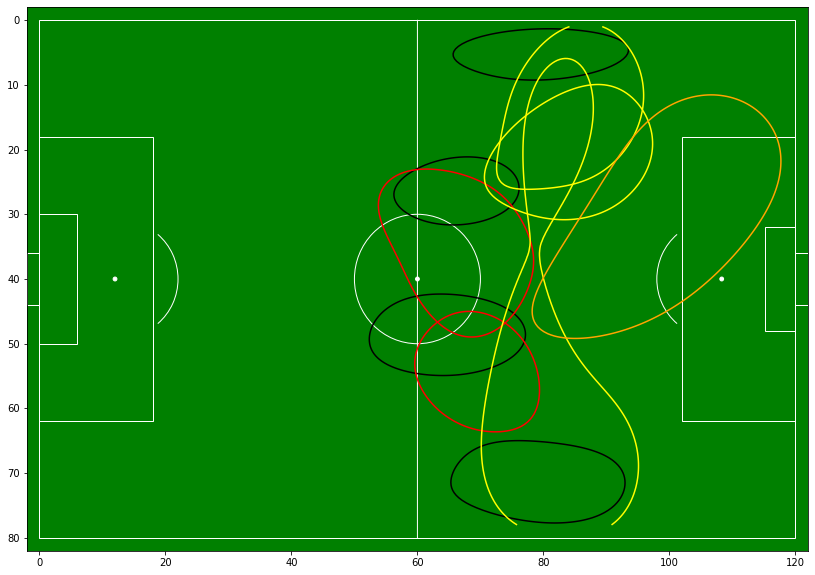

In [109]:
# https://stackoverflow.com/questions/49671053/how-to-set-the-line-style-for-each-kdeplot-in-a-jointgrid@
# https://seaborn.pydata.org/generated/seaborn.kdeplot.html
# https://stackoverflow.com/questions/64362044/what-does-levels-mean-in-seaborn-kde-plot

fig, ax = plt.subplots(figsize=(14, 10))
ax.set_facecolor('green')

# kde plot

x_coord = [i[0] for i in rb_passes_7582["location"]]
y_coord = [i[1] for i in rb_passes_7582["location"]]
sns.kdeplot(x_coord, y_coord, fill = False, color = 'black', levels = [.75], cut = 0)

x_coord = [i[0] for i in rcb_passes_7582["location"]]
y_coord = [i[1] for i in rcb_passes_7582["location"]]
sns.kdeplot(x_coord, y_coord, fill = False, color = 'black', levels = [.75], cut = 0)

x_coord = [i[0] for i in lcb_passes_7582["location"]]
y_coord = [i[1] for i in lcb_passes_7582["location"]]
sns.kdeplot(x_coord, y_coord, fill = False, color = 'black', levels = [.75], cut = 0)

x_coord = [i[0] for i in lb_passes_7582["location"]]
y_coord = [i[1] for i in lb_passes_7582["location"]]
sns.kdeplot(x_coord, y_coord, fill = False, color = 'black', levels = [.75], cut = 0)


x_coord = [i[0] for i in rdm_passes_7582["location"]]
y_coord = [i[1] for i in rdm_passes_7582["location"]]
sns.kdeplot(x_coord, y_coord, fill = False, color = "red", levels = [.75], cut = 0)

x_coord = [i[0] for i in ldm_passes_7582["location"]]
y_coord = [i[1] for i in ldm_passes_7582["location"]]
sns.kdeplot(x_coord, y_coord, fill = False, color = "red", levels = [.75], cut = 0)

x_coord = [i[0] for i in rm_passes_7582["location"]]
y_coord = [i[1] for i in rm_passes_7582["location"]]
tm_test = sns.kdeplot(x_coord, y_coord, fill = False, color = "yellow", levels = [.68], cut = 0)

x_coord = [i[0] for i in cam_passes_7582["location"]]
y_coord = [i[1] for i in cam_passes_7582["location"]]
sns.kdeplot(x_coord, y_coord, fill = False, color = "yellow", levels = [.75], cut = 0)

x_coord = [i[0] for i in lm_passes_7582["location"]]
y_coord = [i[1] for i in lm_passes_7582["location"]]
sns.kdeplot(x_coord, y_coord, fill = False, color = "yellow", levels = [.75], cut = 0)
    
x_coord = [i[0] for i in cf_passes_7582["location"]]
y_coord = [i[1] for i in cf_passes_7582["location"]]
sns.kdeplot(x_coord, y_coord, fill = False, color = "orange", levels=[.75], cut = 0)


draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(82, -2)
plt.xlim(-2, 122)
plt.axis('on')
#plt.gca().invert_yaxis()
plt.show()


In [110]:
# Remember that these areas only represent location of passing action, and nothing else.

# When I make the level .75, are 25% of the furthest observations excluded from the probability distribution calculations?

# One pattern observations seems to be that the bigger the location the less the passing. So that lack of effective passing
#       from moving around needs to be made up for by dribbling or shooting; otherwise, the player is going to have a low
#       xT which would then need to be makde up for by defensive actions (i.e., lowering the xT of an opponent or opponents)

#       Could we create an xD Expected Disruption measure for defensive actions? Based on positioning, anticipation, etc.

# Can we get the area of each plot area?

# We could do the same thing with passes received, dribbles, shotes, etc., and plot each players' set of location KDEs in order to 
# create a location of action profile. Then we could put the actual numbers up for each location / event type to create 
# PLayer profiles.


## 2. Get Peak Location of the KDE Plots

### We get the xy coordinates of each peak and use those locations
### for the pass network

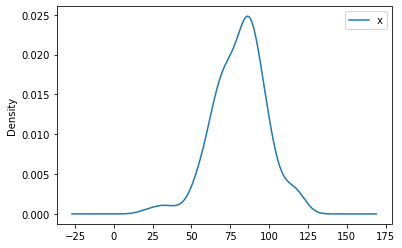

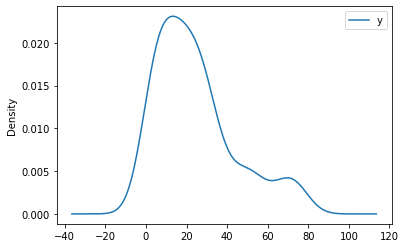

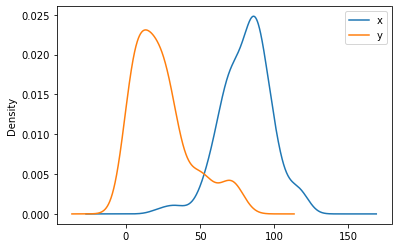

In [111]:
# e.g. using the left midfielder

lm_improved_x = lm_passes_7582[['x']].plot.kde()
lm_improved_y = lm_passes_7582[['y']].plot.kde()
lm_improved = lm_passes_7582[['x','y']].plot.kde() 


# https://stackoverflow.com/questions/56066076/find-x-y-coordinate-of-dataframe-plot-kde/56068475

In [112]:
# get the list of objects from the plot object. 
# which object do we want to find the x axis values of the center of both curves?
print(lm_improved_x.get_children())

[<matplotlib.lines.Line2D object at 0x000001EC98667BE0>, <matplotlib.spines.Spine object at 0x000001EC98622050>, <matplotlib.spines.Spine object at 0x000001EC98622170>, <matplotlib.spines.Spine object at 0x000001EC98622290>, <matplotlib.spines.Spine object at 0x000001EC986223B0>, <matplotlib.axis.XAxis object at 0x000001EC98621FF0>, <matplotlib.axis.YAxis object at 0x000001EC98622890>, Text(0.5, 1.0, ''), Text(0.0, 1.0, ''), Text(1.0, 1.0, ''), <matplotlib.legend.Legend object at 0x000001EC98667610>, <matplotlib.patches.Rectangle object at 0x000001EC98665390>]


In [113]:
x_v = lm_improved_x.get_children( )[0].get_path()
x_v = x_v.vertices
print(x_v)

[[-2.70000000e+01  4.22823010e-18]
 [-2.68038038e+01  5.46922460e-18]
 [-2.66076076e+01  7.06715310e-18]
 ...
 [ 1.68607608e+02  1.09939134e-17]
 [ 1.68803804e+02  8.49091388e-18]
 [ 1.69000000e+02  6.55106846e-18]]


In [114]:
y_v = lm_improved_y.get_children( )[0].get_path()
y_v = y_v.vertices
print(y_v)

[[-3.65000000e+01  2.49033690e-09]
 [-3.63498498e+01  2.79332313e-09]
 [-3.61996997e+01  3.13180513e-09]
 ...
 [ 1.13199700e+02  9.10301570e-10]
 [ 1.13349850e+02  8.12027095e-10]
 [ 1.13500000e+02  7.24043390e-10]]


In [115]:
xx, xy = np.split(x_v, 2, 1)

yx, yy = np.split(y_v, 2, 1)

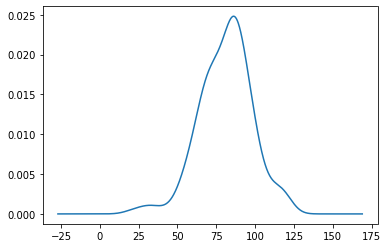

In [116]:
plt.plot(xx,xy)
plt.show()

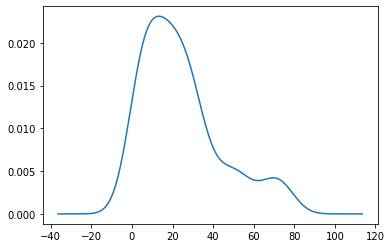

In [117]:
plt.plot(yx,yy)
plt.show()

In [118]:
# Get the max y for x_v (the x points)
xy.max()


0.024818484145681986

In [119]:
# Now we can find the xx location of the xy max
print(np.where(x_v == xy.max()))

(array([577], dtype=int64), array([1], dtype=int64))


In [120]:
# It's at location 577 and it's 8.62 +1 which is 86. So x = 86 and y = .0248
x_v[577]

array([8.62052052e+01, 2.48184841e-02])

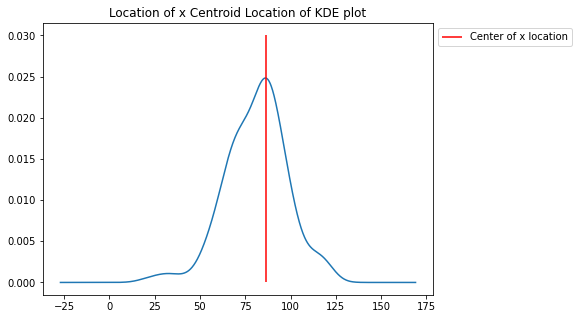

In [121]:
# BOOM! We have the central x location of the KDE plot for the LM

fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(xx,xy)
ax.vlines(x=x_v[577][0], ymin=0, ymax=.03, color='r', label='Center of x location')
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.title.set_text('Location of x Centroid Location of KDE plot')
plt.show()

In [122]:
# Now for the central y location of the KDE plot for the lM
yy.max()

0.023102665114468533

In [123]:
print(np.where(y_v == yy.max()))

(array([331], dtype=int64), array([1], dtype=int64))


In [124]:
y_v[331]

array([13.1996997 ,  0.02310267])

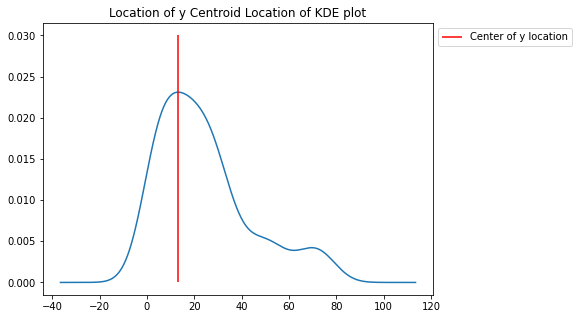

In [125]:
fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(yx,yy)
ax.vlines(x=y_v[331][0], ymin=0, ymax=.03, color='r', label='Center of y location')
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.title.set_text('Location of y Centroid Location of KDE plot')
plt.show()

In [126]:
improved_lm = [x_v[577][0], y_v[331][0]]

In [127]:
improved_lm

[86.2052052052052, 13.1996996996997]

In [128]:
# We should print the x and y plots with their centroids in one graph

### Now calculate for the rest of the team (we're not printing anything extra out)

[7.0945945945945965, 39.67567567567568]

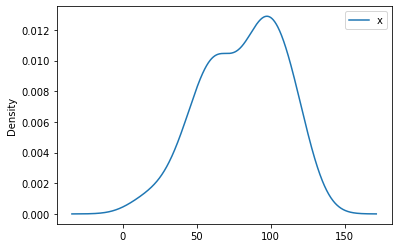

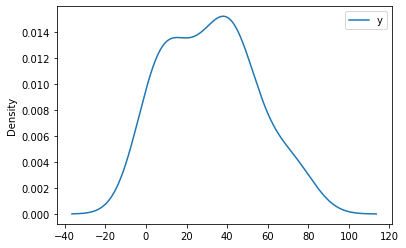

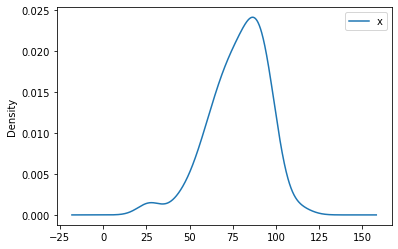

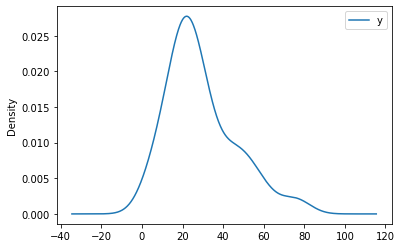

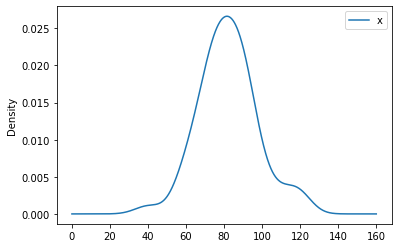

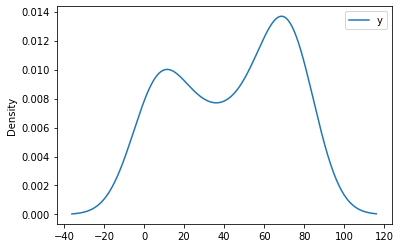

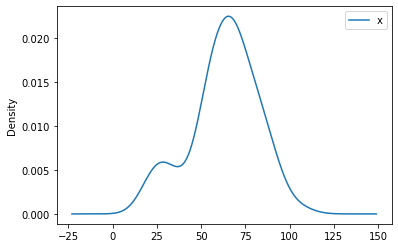

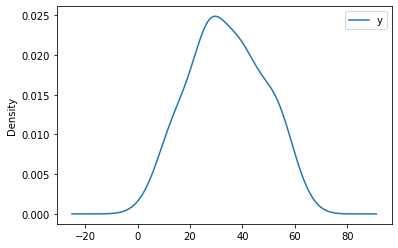

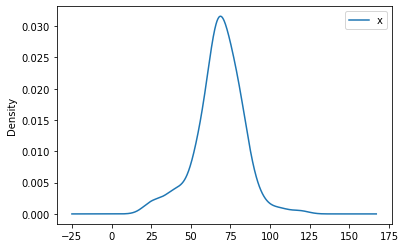

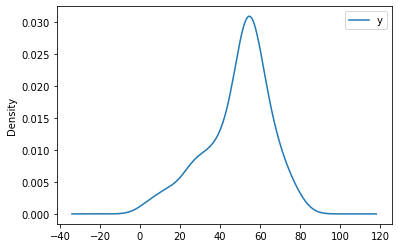

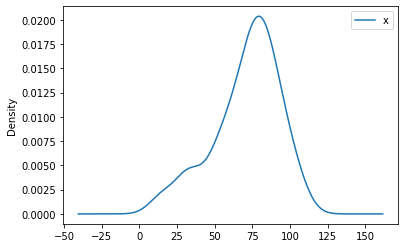

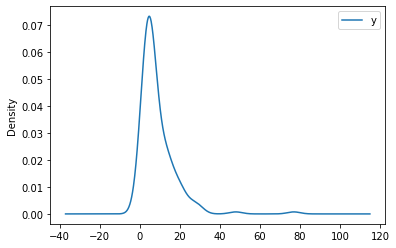

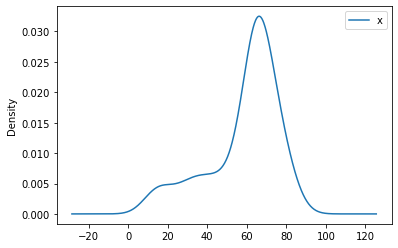

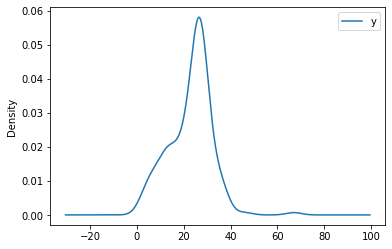

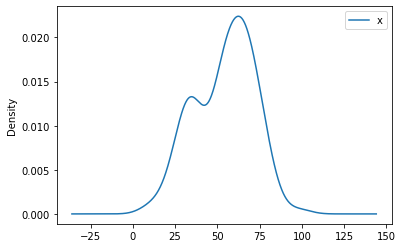

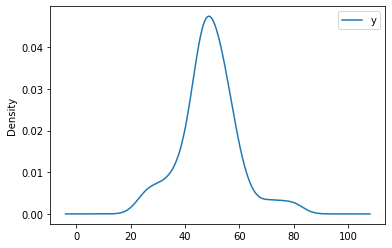

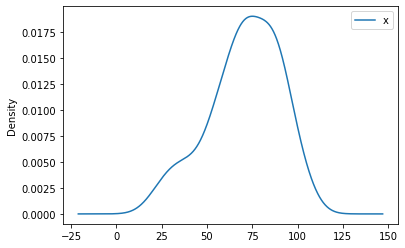

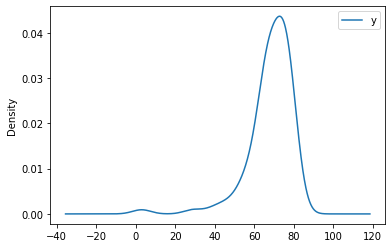

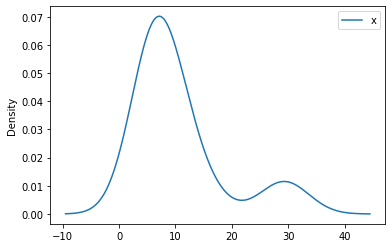

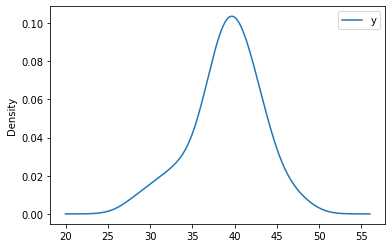

In [129]:
# CF
cf_improved_x = cf_passes_7582[['x']].plot.kde()
cf_improved_y = cf_passes_7582[['y']].plot.kde()

x_v = cf_improved_x.get_children( )[0].get_path()
x_v = x_v.vertices

y_v = cf_improved_y.get_children( )[0].get_path()
y_v = y_v.vertices

xx, xy = np.split(x_v, 2, 1)
yx, yy = np.split(y_v, 2, 1)

improved_cf = [x_v[640][0], y_v[496][0]]
improved_cf

# CAM
cam_improved_x = cam_passes_7582[['x']].plot.kde()
cam_improved_y = cam_passes_7582[['y']].plot.kde()

x_v = cam_improved_x.get_children( )[0].get_path()
x_v = x_v.vertices

y_v = cam_improved_y.get_children( )[0].get_path()
y_v = y_v.vertices

xx, xy = np.split(x_v, 2, 1)
yx, yy = np.split(y_v, 2, 1)

improved_cam = [x_v[593][0], y_v[377][0]]
improved_cam 

# RM
# Here we have two y peaks because the rm spent time roaming across the field.
# We'll deal with how to make this clear later, but it's still better that showing the avg location
#    which puts the rm in the center of the field (where neither peak is)
rm_improved_x = rm_passes_7582[['x']].plot.kde()
rm_improved_y = rm_passes_7582[['y']].plot.kde()

x_v = rm_improved_x.get_children( )[0].get_path()
x_v = x_v.vertices

y_v = rm_improved_y.get_children( )[0].get_path()
y_v = y_v.vertices

xx, xy = np.split(x_v, 2, 1)
yx, yy = np.split(y_v, 2, 1)

improved_rm = [x_v[509][0], y_v[688][0]]
improved_rm

# LDM
ldm_improved_x = ldm_passes_7582[['x']].plot.kde()
ldm_improved_y = ldm_passes_7582[['y']].plot.kde()

x_v = ldm_improved_x.get_children( )[0].get_path()
x_v = x_v.vertices

y_v = ldm_improved_y.get_children( )[0].get_path()
y_v = y_v.vertices

xx, xy = np.split(x_v, 2, 1)
yx, yy = np.split(y_v, 2, 1)

improved_ldm = [x_v[514][0], y_v[470][0]]
improved_ldm

# RDM
rdm_improved_x = rdm_passes_7582[['x']].plot.kde()
rdm_improved_y = rdm_passes_7582[['y']].plot.kde()

x_v = rdm_improved_x.get_children( )[0].get_path()
x_v = x_v.vertices

y_v = rdm_improved_y.get_children( )[0].get_path()
y_v = y_v.vertices

xx, xy = np.split(x_v, 2, 1)
yx, yy = np.split(y_v, 2, 1)

improved_rdm = [x_v[488][0], y_v[582][0]]
improved_rdm

# LB
lb_improved_x = lb_passes_7582[['x']].plot.kde()
lb_improved_y = lb_passes_7582[['y']].plot.kde()

x_v = lb_improved_x.get_children( )[0].get_path()
x_v = x_v.vertices

y_v = lb_improved_y.get_children( )[0].get_path()
y_v = y_v.vertices

xx, xy = np.split(x_v, 2, 1)
yx, yy = np.split(y_v, 2, 1)

improved_lb = [x_v[592][0], y_v[275][0]]
improved_lb

# LCB
lcb_improved_x = lcb_passes_7582[['x']].plot.kde()
lcb_improved_y = lcb_passes_7582[['y']].plot.kde()

x_v = lcb_improved_x.get_children( )[0].get_path()
x_v = x_v.vertices

y_v = lcb_improved_y.get_children( )[0].get_path()
y_v = y_v.vertices

xx, xy = np.split(x_v, 2, 1)
yx, yy = np.split(y_v, 2, 1)

improved_lcb = [x_v[614][0], y_v[438][0]]
improved_lcb

# RCB
rcb_improved_x = rcb_passes_7582[['x']].plot.kde()
rcb_improved_y = rcb_passes_7582[['y']].plot.kde()

x_v = rcb_improved_x.get_children( )[0].get_path()
x_v = x_v.vertices

y_v = rcb_improved_y.get_children( )[0].get_path()
y_v = y_v.vertices

xx, xy = np.split(x_v, 2, 1)
yx, yy = np.split(y_v, 2, 1)

improved_rcb = [x_v[546][0], y_v[470][0]]
improved_rcb

# RB
rb_improved_x = rb_passes_7582[['x']].plot.kde()
rb_improved_y = rb_passes_7582[['y']].plot.kde()

x_v = rb_improved_x.get_children( )[0].get_path()
x_v = x_v.vertices

y_v = rb_improved_y.get_children( )[0].get_path()
y_v = y_v.vertices

xx, xy = np.split(x_v, 2, 1)
yx, yy = np.split(y_v, 2, 1)

improved_rb = [x_v[571][0], y_v[702][0]]
improved_rb

# GK
gk_improved_x = gk_passes_7582[['x']].plot.kde()
gk_improved_y = gk_passes_7582[['y']].plot.kde()

x_v = gk_improved_x.get_children( )[0].get_path()
x_v = x_v.vertices

y_v = gk_improved_y.get_children( )[0].get_path()
y_v = y_v.vertices

xx, xy = np.split(x_v, 2, 1)
yx, yy = np.split(y_v, 2, 1)

improved_gk = [x_v[307][0], y_v[546][0]]
improved_gk

## Modify the necessary DFs for the improved Pass Network

### avg_loc will get one new column: "improved_loc" 
### pass_network_df' will get two new columns: 'improved_start_loc' and 'improved_end_loc'

In [130]:
# plot on the pass network
# We use only the x values of the two numpy arrays (x_v and y_v), so that's the new location LM [86.2, 13.2]  

In [131]:
# Create a dict with the necessary mapping info

temp_list=avg_loc['position_abb_pass'].tolist()

temp_list

improved_pos_list=[improved_gk, improved_lb, improved_lcb, improved_rcb, improved_rb, improved_ldm, improved_rdm, 
improved_lm, improved_cam, improved_rm, improved_cf]

In [132]:
# How do I automate putting this dict together?

improved_pos_dict = {'GK':improved_gk, 'RB':improved_rb, 'RCB':improved_rcb, 'LCB': improved_lcb, 'LB': improved_lb, 'RDM': improved_rdm, 'LDM': improved_ldm, 'RM': improved_rm,
                  'LM': improved_lm, 'CAM': improved_cam, 'CF': improved_cf}

In [133]:
# Add a column 'improved_loc' to avg_loc DF
avg_loc["improved_loc"] = avg_loc["position_abb_pass"].map(improved_pos_dict)

In [134]:
avg_loc.head(1)

,position_abb_pass,count,location_pass,improved_loc
0,CAM,81,"[78.18518518518519, 29.02469135802469]","[86.47247247247248, 22.106606606606604]"


In [135]:
# add two columns: 'improved_start_loc' and 'improved_end_loc' to pass_network_df 

pass_network_df["improved_start_loc"] = pass_network_df["position_abb_pass"].map(improved_pos_dict)
pass_network_df["improved_end_loc"] = pass_network_df["position_abb_receive"].map(improved_pos_dict)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_788\3376380300.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pass_network_df["improved_start_loc"] = pass_network_df["position_abb_pass"].map(improved_pos_dict)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_788\3376380300.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pass_network_df["improved_end_loc"] = pass_network_df["position_abb_receive"].map(improved_pos_dict)


In [136]:
pass_network_df.head(1)

,position_abb_pass,position_abb_receive,start_loc,end_loc,No of passes,improved_start_loc,improved_end_loc
0,LB,LM,"[70.97590361445783, 8.74698795180723]","[81.1375, 24.3875]",60,"[79.2037037037037, 4.841841841841848]","[86.2052052052052, 13.1996996996997]"


## Plot the Improved Pass Network with Expected Pass threat (XpT)

In [137]:
# Calculating Expected Threat (xT), based on passes, for each postition of the pass network

# avg_loc has the total number of passes from each position ('count' column) and
#     pass_network_df has number of passes to and from each combination ('No of passes' column)

spain_passes_successful_7582 = spain_passes_7582[spain_passes_7582['pass_outcome'].isnull()]

spain_passes_successful_7582

# Here's where we get the probability distribution based on a probability grid

# bring in the probability grid
xT = pd.read_csv('C:\\Users\\ADMIN\\Desktop\\SOCCER\\Data Sources\\xT_grid.csv' ,header=None)

# convert it to an np array
xT = np.array(xT)

# Create row and column bins based on the array's shape (8 x 12_)
xT_rows, xT_columns = xT.shape

# Create columns for the bins and bin the pass location data
spain_passes_successful_7582['x1_bin'] = pd.cut(spain_passes_successful_7582['location'].str[0], bins = xT_columns, labels=False)
spain_passes_successful_7582['y1_bin'] = pd.cut(spain_passes_successful_7582['location'].str[1], bins = xT_rows, labels=False)
spain_passes_successful_7582['x2_bin'] = pd.cut(spain_passes_successful_7582['pass_end_location'].str[0], bins = xT_columns, labels=False)
spain_passes_successful_7582['y2_bin'] = pd.cut(spain_passes_successful_7582['pass_end_location'].str[1], bins = xT_rows, labels=False)

spain_passes_successful_7582

# Use a lamda function to calulate the probability grid for the start and end zone of passes.

spain_passes_successful_7582['start_zone_value'] = spain_passes_successful_7582[['x1_bin', 'y1_bin']].apply(lambda x: xT[x[1]][x[0]], axis = 1)
spain_passes_successful_7582['end_zone_value'] = spain_passes_successful_7582[['x2_bin', 'y2_bin']].apply(lambda x: xT[x[1]][x[0]], axis = 1)

spain_passes_successful_7582

# Calculate the difference between start and end zone values (i.e., xT)

spain_passes_successful_7582['xT'] = spain_passes_successful_7582['end_zone_value'] - spain_passes_successful_7582['start_zone_value'] 

# Completed. A column with the xT of each successful pass

spain_passes_successful_7582.head(1)

# Spain's Total Passing xT v. Russia 2018 World Cup
spain_passes_successful_7582['xT'].sum()

# Now we 
# 1. break xT down by player
# 2. change the color of the player marker accordingly

gk_passes_successful_7582 = spain_passes_successful_7582[(spain_passes_successful_7582["position_abb_pass"] == 'GK')]

gk_passes_successful_7582['xT'].sum()

lb_passes_successful_7582 = spain_passes_successful_7582[(spain_passes_successful_7582["position_abb_pass"] == 'LB')]

lb_passes_successful_7582['xT'].sum()

lcb_passes_successful_7582 = spain_passes_successful_7582[(spain_passes_successful_7582["position_abb_pass"] == 'LCB')]

lcb_passes_successful_7582['xT'].sum()

rcb_passes_successful_7582 = spain_passes_successful_7582[(spain_passes_successful_7582["position_abb_pass"] == 'RCB')]

rcb_passes_successful_7582['xT'].sum()

rb_passes_successful_7582 = spain_passes_successful_7582[(spain_passes_successful_7582["position_abb_pass"] == 'RB')]

# This is interesting: Better than the rest of the back line and with far fewer passes
rb_passes_successful_7582['xT'].sum()

ldm_passes_successful_7582 = spain_passes_successful_7582[(spain_passes_successful_7582["position_abb_pass"] == 'LDM')]

# This matches up with the relative lack of passing activity because of the bad positioning
ldm_passes_successful_7582['xT'].sum()

rdm_passes_successful_7582 = spain_passes_successful_7582[(spain_passes_successful_7582["position_abb_pass"] == 'RDM')]

# Why so high? The RDM to LM connection?
rdm_passes_successful_7582['xT'].sum()

# Defense xT Summary
# The right side, with far fewer passes, had a passing xT twice as high as the left side.

lm_passes_successful_7582 = spain_passes_successful_7582[(spain_passes_successful_7582["position_abb_pass"] == 'LM')]

lm_passes_successful_7582['xT'].sum()

cam_passes_successful_7582 = spain_passes_successful_7582[(spain_passes_successful_7582["position_abb_pass"] == 'CAM')]

# Bad news. Maybe he was more of a false 9 trying to score instead of pass?
#    Maybe a receive map / network and shot map would tell us more about why his
#    passing xT is so low
cam_passes_successful_7582['xT'].sum()

rm_passes_successful_7582 = spain_passes_successful_7582[(spain_passes_successful_7582["position_abb_pass"] == 'RM')]

# Not as bad as the KDE and pass map look. Looks like another quality over quantity example.
rm_passes_successful_7582['xT'].sum()

cf_passes_successful_7582 = spain_passes_successful_7582[(spain_passes_successful_7582["position_abb_pass"] == 'CF')]

# I guess this makes sense if he's the target man trying to score
cf_passes_successful_7582['xT'].sum()

# Offense xT Passing Summary
# The left side, with far more passes, was marginally better than the right side.
# Overall, the right side had a higher contribution to passing xT (by about .5) with far fewer passes

## We use the "_passes_successful_7582['xT'].sum() values to color the player markers

#The avg_loc DF contains both the average and improved location columns
avg_loc.head()

#1. Create the dict
test_dict = {'CAM':cam_passes_successful_7582['xT'].sum(),'LM':lm_passes_successful_7582['xT'].sum(),'RM':rm_passes_successful_7582['xT'].sum(),'CF':cf_passes_successful_7582['xT'].sum(),'GK':gk_passes_successful_7582['xT'].sum(),'LB':lb_passes_successful_7582['xT'].sum(),'LCB':lcb_passes_successful_7582['xT'].sum(),'RCB':rcb_passes_successful_7582['xT'].sum(), 'RB':rb_passes_successful_7582['xT'].sum(),'LDM':ldm_passes_successful_7582['xT'].sum(),'RDM':rdm_passes_successful_7582['xT'].sum()}

#2.  add a column 'xT' to avg_loc DF with the the mapped test_dict info
avg_loc["xT"] = avg_loc['position_abb_pass'].map(test_dict)

# Now we can map colors to the xT column in avg_loc

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_788\595483440.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spain_passes_successful_7582['x1_bin'] = pd.cut(spain_passes_successful_7582['location'].str[0], bins = xT_columns, labels=False)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_788\595483440.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spain_passes_successful_7582['y1_bin'] = pd.cut(spain_passes_successful_7582['location'].str[1], bins = xT_rows, labels=False)
C:\Users\ADMIN\AppData\Local\Temp

In [138]:
# DF ready to go with avg location or improved location + passing xT
avg_loc

,position_abb_pass,count,location_pass,improved_loc,xT
0,CAM,81,"[78.18518518518519, 29.02469135802469]","[86.47247247247248, 22.106606606606604]",0.232305
1,CF,31,"[81.06451612903226, 31.774193548387096]","[97.47197197197195, 37.974474474474476]",0.098656
2,GK,24,"[10.458333333333334, 39.041666666666664]","[7.0945945945945965, 39.67567567567568]",0.036076
3,LB,166,"[70.97590361445783, 8.74698795180723]","[79.2037037037037, 4.841841841841848]",0.187715
4,LCB,180,"[58.56666666666667, 22.883333333333333]","[66.15065065065065, 26.496996996996998]",0.347381
5,LDM,81,"[63.06172839506173, 33.888888888888886]","[65.4964964964965, 29.574574574574577]",0.127411
6,LM,160,"[81.1375, 24.3875]","[86.2052052052052, 13.1996996996997]",0.644310
7,RB,93,"[70.73118279569893, 68.0752688172043]","[75.02402402402403, 72.71621621621621]",0.406283
8,RCB,132,"[54.053030303030305, 48.99242424242424]","[62.37837837837837, 48.692692692692695]",0.193542
9,RDM,154,"[68.09740259740259, 48.967532467532465]","[68.7897897897898, 54.552552552552555]",0.649288


# Plot the Improved Pass Network with XpT

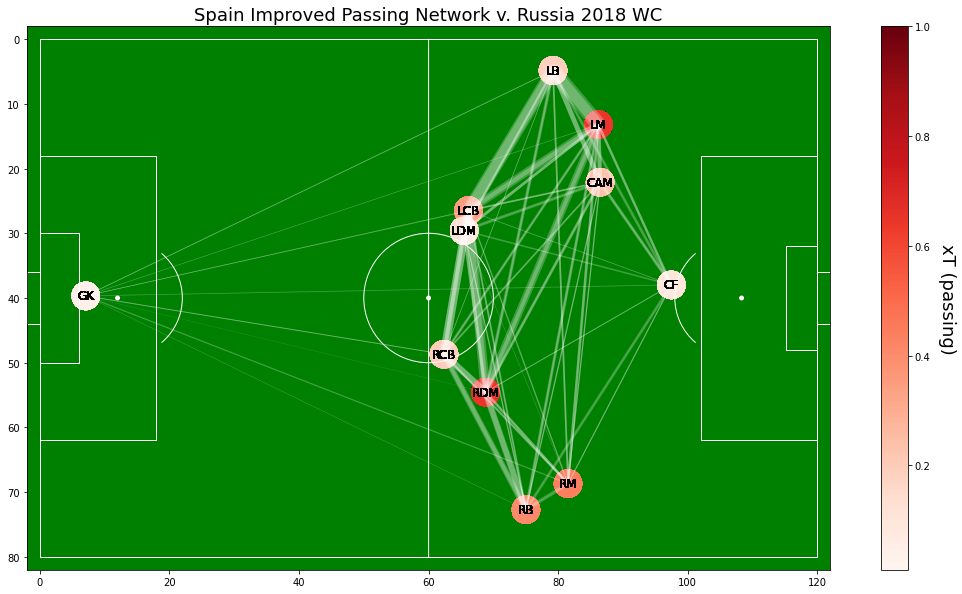

In [139]:
import matplotlib
import matplotlib.cm as cm

fig, ax = plt.subplots(figsize=(18, 10)) # This is 14, 10 without the colorbar
ax.set_facecolor('green')
fig.patch.set_facecolor('white')
#fig.patch.set_alpha(0.7)


# plot pass lines 
# We manipulate 'linewidth' and 'alpha' based on No_of_passes value. 
# For 'alpha,' we need to create a normalized column of .1 to 1

   
for i in range(len(pass_network_df)):
    ax.annotate('',xy = (pass_network_df.iloc[i]['improved_start_loc'][0], pass_network_df.iloc[i]['improved_start_loc'][1]), xycoords = 'data',
              xytext = (pass_network_df.iloc[i]['improved_end_loc'][0], pass_network_df.iloc[i]['improved_end_loc'][1]), textcoords = 'data',
              arrowprops=dict(arrowstyle="-",connectionstyle="arc3", linewidth=pass_network_df['No of passes'][i]/4, color='white', alpha=alpha),)   
    
 
    # If we weren't using a color map to color the markers then we'd use the line below:
    # for i in avg_loc['improved_loc']: plt.scatter(*i, s = 750, color ='red', edgecolors='black', linewidth=1, alpha=.75)
 
    
    # plot position markers and color the marker based on xT

    #1. Get color mapper and values ready
    
    values = avg_loc['xT']
    norm = matplotlib.colors.Normalize(vmin=.01, vmax= 1, clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.Reds)
    
    # Or alternatively
    
    #minima = min(avg_loc.xT)
    #maxima = max(avg_loc.xT)
    #norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
    #mapper = cm.ScalarMappable(norm=norm, cmap=cm.Reds)
     
    #2. Map each value to a color  
    plt.scatter(*zip(*avg_loc['improved_loc']), s = 750, color = mapper.to_rgba(values))  
             
    # Put position name in the position markers    
    
    for index, row in avg_loc.iterrows():
        ax.annotate(row['position_abb_pass'], xy=(row['improved_loc'][0], row['improved_loc'][1]), c='black', va='center',
                   ha='center', size=12)  
        
        
draw_pitch(ax) #overlay our different objects on the pitch

plt.ylim(-2, 82)  # here we keep the 0,0, origins so we need to flip the y coordinates using 'plt.gca().invert_yaxis()''
plt.xlim(-2, 122)
plt.axis('on')
plt.title('Spain Improved Passing Network v. Russia 2018 WC', fontsize = 18)
plt.gca().invert_yaxis()  # flip the y coordinates so they plot correctly
cbar = fig.colorbar(mapper)  # Put in a color bar to reference xT colors
cbar.set_label('xT (passing)', fontsize = 18, rotation=270, labelpad = 25)
plt.show()


In [140]:
# Check to make sure colors correspond to the xT values
avg_loc[['position_abb_pass','xT']].sort_values(by='xT', ascending=False)

,position_abb_pass,xT
9,RDM,0.649288
6,LM,0.644310
10,RM,0.440921
7,RB,0.406283
4,LCB,0.347381
0,CAM,0.232305
8,RCB,0.193542
3,LB,0.187715
5,LDM,0.127411
1,CF,0.098656
